In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("output_data.csv")

In [69]:
df.head()

,SamplingMethod,DatasetType,NrOfPoints,Seed,SampleSize,TotalTime,RoundTimes,CoresetSize,AvgQuality,NormQuality
0,Grid,Noisy circle,10000,105,0.0,61.16,"[13.12, 10.74, 7.73, 7.36]",7,1.523497,1.668048
1,Ball,Noisy circle,10000,105,10.0,43.99,"[8.9, 8.2, 17.13, 9.49]",11,1.794559,1.089988
2,Ball,Noisy circle,10000,105,100.0,37.93,"[8.08, 7.92, 7.86, 13.79]",108,1.612787,1.072935
3,Ball,Noisy circle,10000,105,1000.0,50.93,"[15.76, 12.75, 10.13, 11.83]",6084,1.640791,1.339760
4,Grid,Noisy moon,10000,105,0.0,45.89,"[12.82, 11.3, 11.17, 10.16]",5,1.884700,1.950854


### Coreset size

In [70]:
def plot_coreset(df):
    # coreset size per dataset for ball vs. grid
    dataset_types = df["DatasetType"].unique().tolist()
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
    axes = axes.ravel()

    for i in range(len(dataset_types)):
        plot = pd.pivot_table(df[df["DatasetType"]==dataset_types[i]], values = 'CoresetSize', index = 'NrOfPoints', columns = 'Method',
                       aggfunc = lambda x: np.mean(x)).plot.bar(ax=axes[i])

        plot.set_ylabel("CoresetSize", size = 12)
        plot.set_xlabel("NrOfPoints", size = 12);
        plot.set_title(dataset_types[i])
    fig.tight_layout()

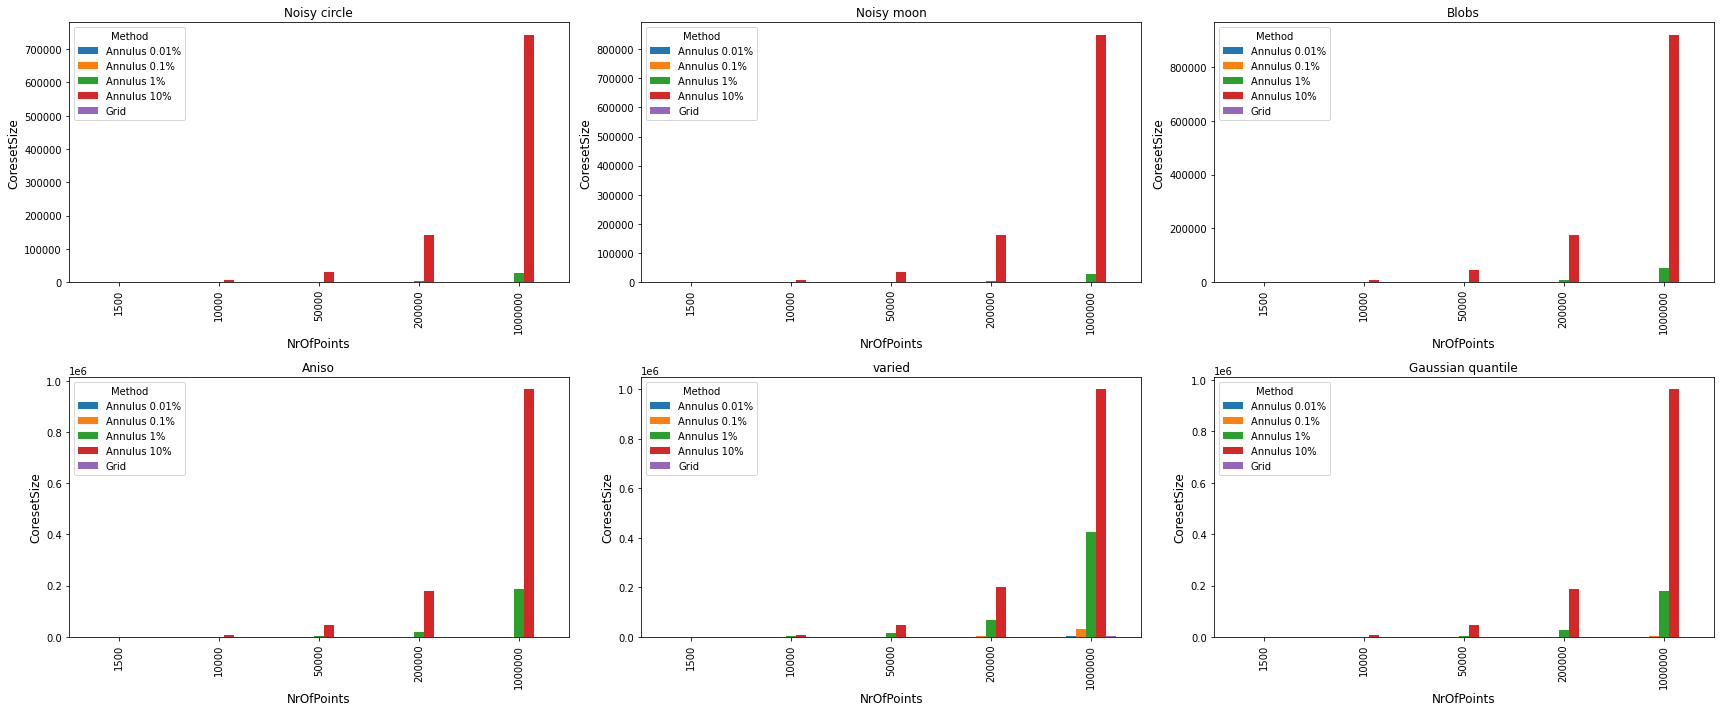

In [71]:
df['SampleRatio'] = df["SampleSize"]/df["NrOfPoints"]*100
conditions = [(df['SamplingMethod']=='Grid'),(df['SamplingMethod']=='Ball')&(df["SampleRatio"]==0.1),
                                             (df['SamplingMethod']=='Ball')&(df["SampleRatio"]==1),
                                             (df['SamplingMethod']=='Ball')&(df["SampleRatio"]==10)]
choices = ['Grid','Annulus 0.1%', 'Annulus 1%', 'Annulus 10%']
df['Method'] = np.select(conditions, choices, default='Annulus 0.01%')

plot_coreset(df)

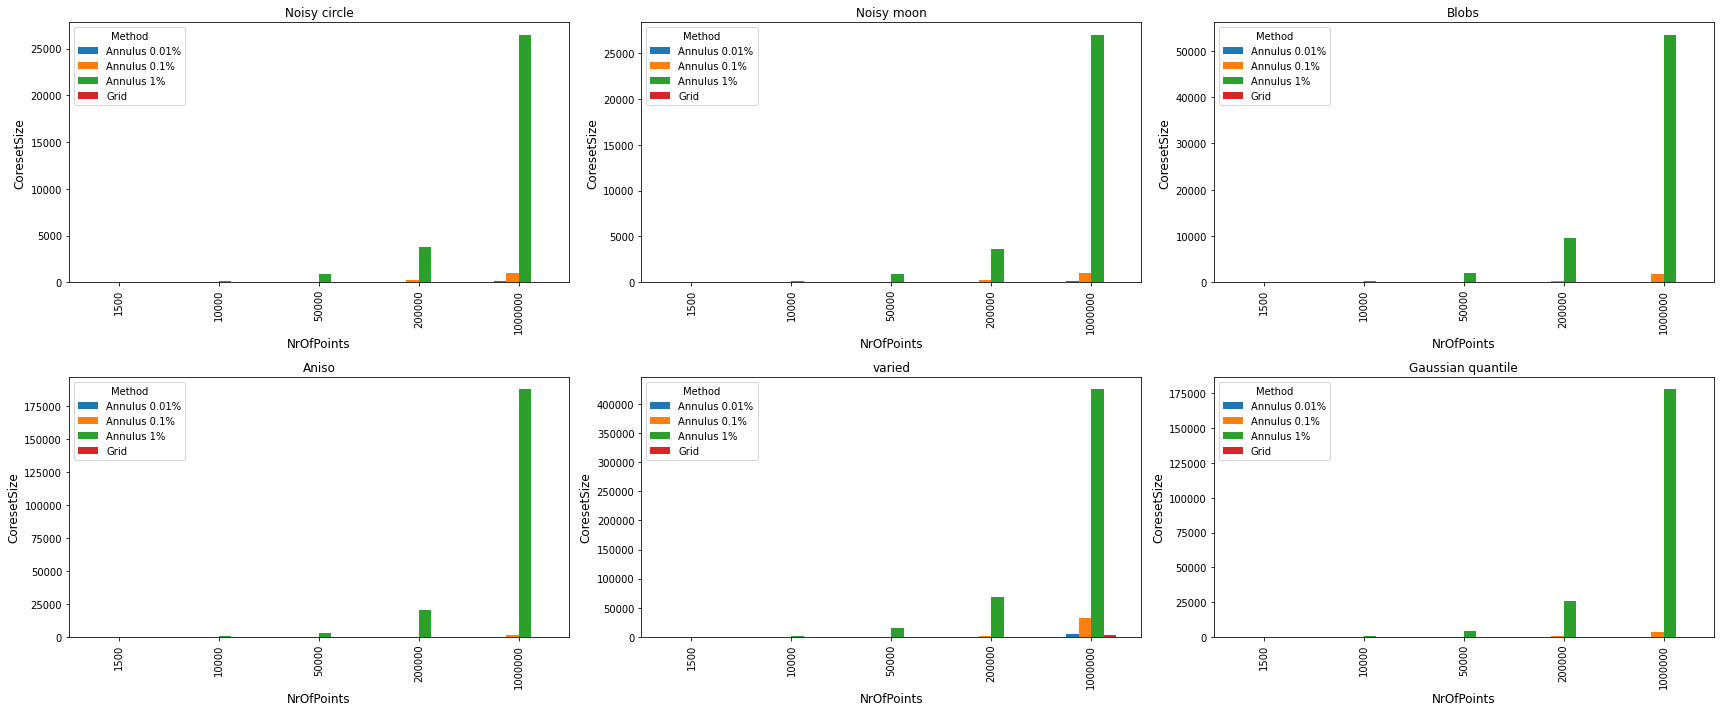

In [72]:
df_ball = df[df["Method"]!="Annulus 10%"]
plot_coreset(df_ball)

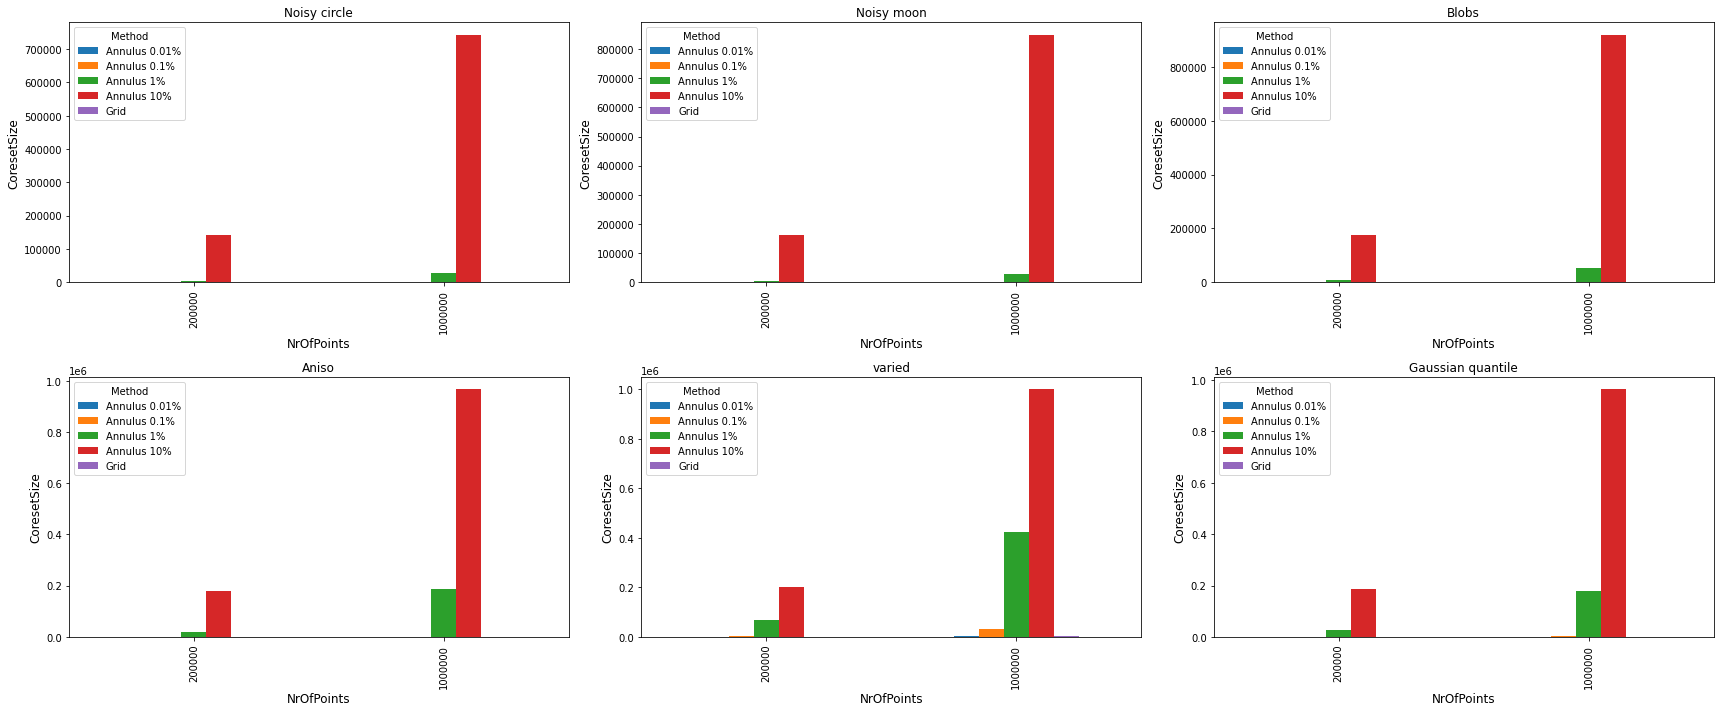

In [73]:
df_ball = df[df["NrOfPoints"].isin([200000, 1000000])]
plot_coreset(df_ball)

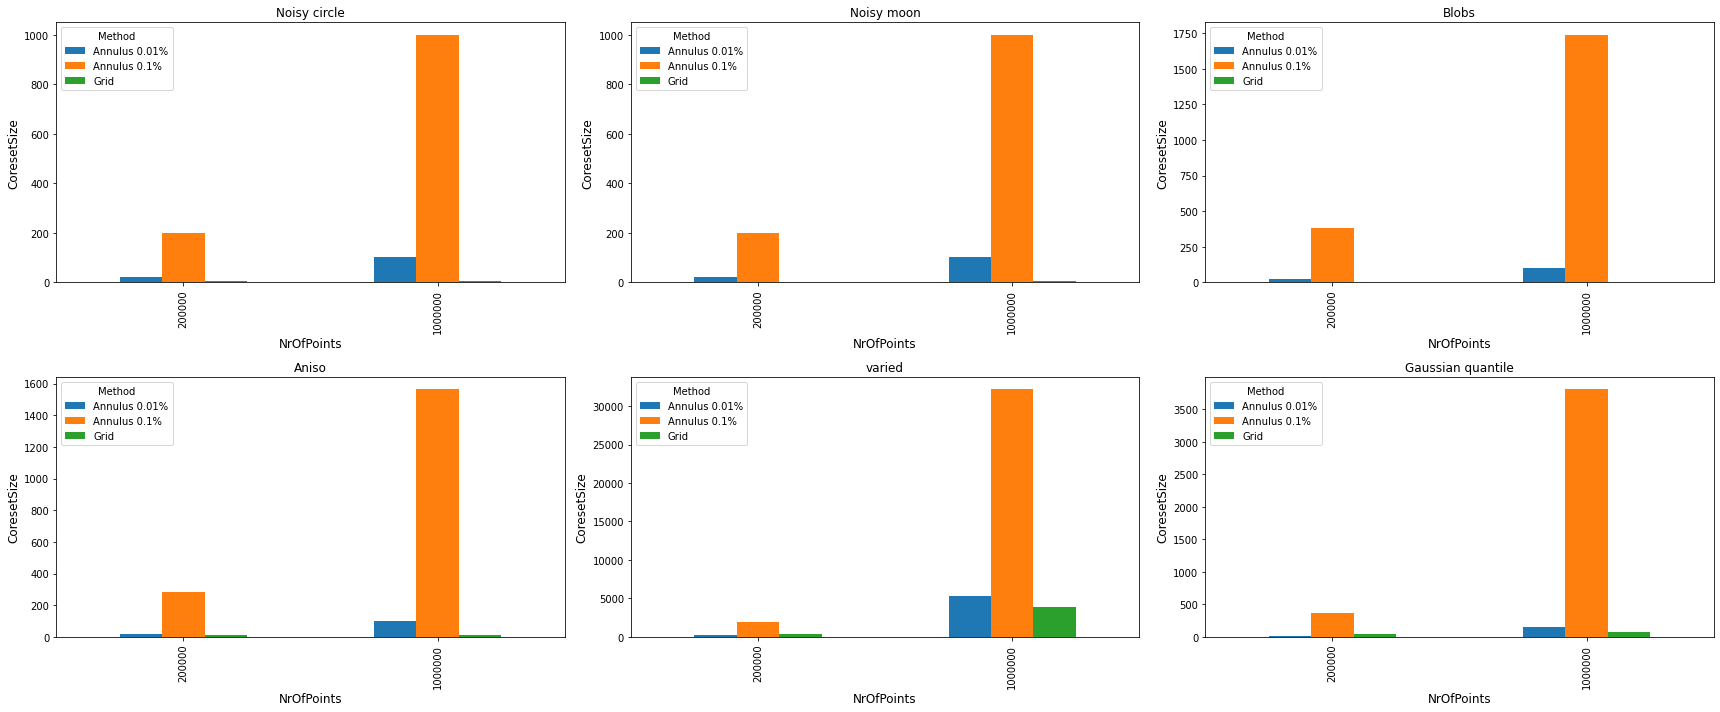

In [75]:
df_ball = df[df["NrOfPoints"].isin([200000, 1000000])]
df_ball = df_ball[(df_ball["Method"]!="Annulus 10%") & (df_ball["Method"]!="Annulus 1%")]
plot_coreset(df_ball)

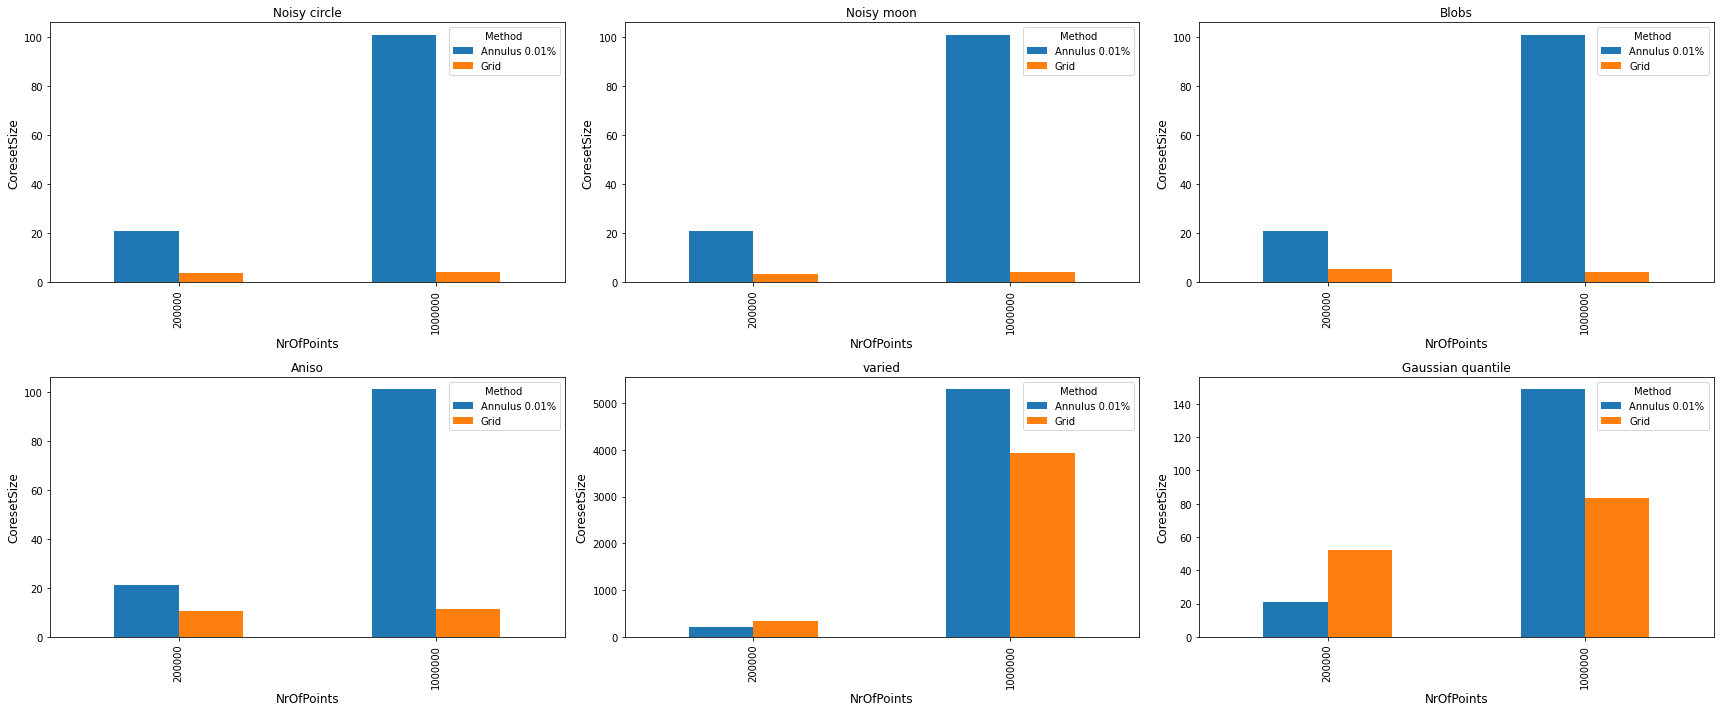

In [86]:
df_ball = df[df["NrOfPoints"].isin([200000, 1000000])]
df_ball = df_ball[df_ball["Method"].isin(["Annulus 0.01%", "Grid"])]
plot_coreset(df_ball)

### Quality of clustering

In [7]:
print(df[df['DatasetType'] == "Noisy circle"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Noisy circle"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              1.602837     1.139552
Grid              1.743147     1.183945


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5           1.892654     1.419635
                          15.0          1.647761     1.028199
                          150.0         1.371182     0.866058
           Grid           0.0           1.304618     0.865947
10000      Ball           10.0          1.722718     1.289988
                          100.0         1.611074     1.059101
                          1000.0        1.589365     1.185549
           Grid           0.0           1.489041     1.099126
50000      Ball           50.0          1.602867     1.239675
                          500.0         1.547976     1.063299
                          5000.0        1.401309     1.087844
           Grid           0.0           2.070626     1.100412
200000     Ball           20.0          1.736234     1.102228
                          200.0         1.646905     0.797055
                          2000.0        1.549952     1.318530
                          20000.0       1.371757     1.439330
           Grid           0.0           1.991215     1.712384
1000000    Ball           100.0         1.875455     1.093117
                          1000.0        1.829312     1.077070
                          10000.0       1.463575     1.359903
                          100000.0      1.413889     0.956889
           Grid           0.0           2.103674     1.466091

In [8]:
print(df[df['DatasetType'] == "Noisy moon"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Noisy moon"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              2.099246     1.450663
Grid              2.141009     1.656271


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5           2.339823     1.205511
                          15.0          2.140176     1.337631
                          150.0         1.907233     1.235634
           Grid           0.0           1.672497     1.404272
10000      Ball           10.0          2.127365     1.371646
                          100.0         1.987956     1.612144
                          1000.0        1.990692     1.628176
           Grid           0.0           2.181015     1.697842
50000      Ball           50.0          2.115465     1.373525
                          500.0         1.902049     1.578955
                          5000.0        1.998165     1.528296
           Grid           0.0           2.221772     1.384315
200000     Ball           20.0          2.214466     1.854740
                          200.0         2.525153     2.108799
                          2000.0        1.790052     1.025760
                          20000.0       2.034558     1.816925
           Grid           0.0           2.426224     1.984155
1000000    Ball           100.0         2.621017     0.946647
                          1000.0        2.378999     1.539797
                          10000.0       2.134542     1.088729
                          100000.0      1.735656     1.531329
           Grid           0.0           2.435364     2.132360

In [9]:
print(df[df['DatasetType'] == "Blobs"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Blobs"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             33.320069    18.160608
Grid             35.316280    16.692226


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          35.257329    18.338682
                          15.0         33.311702    15.281463
                          150.0        33.029896    19.231245
           Grid           0.0          32.284396    19.677553
10000      Ball           10.0         33.715330    21.162302
                          100.0        32.743349    19.341346
                          1000.0       32.599206    16.035478
           Grid           0.0          32.542288     9.814327
50000      Ball           50.0         34.470397    15.801930
                          500.0        33.260462    18.985232
                          5000.0       32.472950    14.638906
           Grid           0.0          35.564313    14.638866
200000     Ball           20.0         33.672801    15.804804
                          200.0        33.437496    28.754550
                          2000.0       32.749235    10.644317
                          20000.0      32.614203    14.250753
           Grid           0.0          38.014872    15.726951
1000000    Ball           100.0        33.116250    25.531319
                          1000.0       33.187129    22.740736
                          10000.0      33.103316    20.783041
                          100000.0     33.046788    14.490163
           Grid           0.0          41.880762    27.567385

In [10]:
print(df[df['DatasetType'] == "Aniso"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Aniso"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             10.491797     7.076242
Grid              9.318651     5.423276


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          11.591850     7.734660
                          15.0         10.785710     7.788308
                          150.0         9.899463     7.465947
           Grid           0.0           8.129667     3.607790
10000      Ball           10.0         11.530484     7.569695
                          100.0        10.098707     7.865050
                          1000.0        8.892038     5.776811
           Grid           0.0           8.488606     6.327991
50000      Ball           50.0         11.384508     8.610230
                          500.0        10.055612     7.811736
                          5000.0        9.386412     6.683620
           Grid           0.0           9.798021     5.032075
200000     Ball           20.0         12.683112     9.299568
                          200.0        11.846781     4.972284
                          2000.0        9.697649     5.474302
                          20000.0       8.999721     5.075658
           Grid           0.0          12.037247     7.896892
1000000    Ball           100.0        12.811094     4.631274
                          1000.0       10.938076     9.301294
                          10000.0       9.333209     5.179189
                          100000.0      9.214584     3.738202
           Grid           0.0          12.531197     6.637568

In [11]:
print(df[df['DatasetType'] == "varied"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "varied"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             19.040328    11.391561
Grid             17.142983     9.790820


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          23.489811    17.508235
                          15.0         18.899673     8.539211
                          150.0        17.731874    11.879491
           Grid           0.0          17.014290    13.254377
10000      Ball           10.0         21.242076    13.045295
                          100.0        18.092520     7.341859
                          1000.0       17.645584    13.018379
           Grid           0.0          17.194600     9.300696
50000      Ball           50.0         20.688562    11.655400
                          500.0        17.980803    11.510901
                          5000.0       17.428871     9.463764
           Grid           0.0          17.149616    10.049773
200000     Ball           20.0         20.886587    10.944759
                          200.0        19.828172    13.733304
                          2000.0       17.523610     9.344006
                          20000.0      17.184936     6.577871
           Grid           0.0          17.187029    13.946574
1000000    Ball           100.0        19.890499    12.602513
                          1000.0       19.273908    10.302337
                          10000.0      17.551246    11.042649
                          100000.0     17.122304    14.187581
           Grid           0.0          17.216344     0.247755

In [12]:
print(df[df['DatasetType'] == "Gaussian quantile"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Gaussian quantile"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              6.373074     3.862115
Grid              4.209291     2.312523


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5           7.353839     4.789236
                          15.0          6.918826     4.012496
                          150.0         5.501826     3.086230
           Grid           0.0           3.842696     2.425803
10000      Ball           10.0          8.993733     5.886501
                          100.0         6.103094     3.609131
                          1000.0        5.142657     3.391457
           Grid           0.0           3.952276     2.289008
50000      Ball           50.0          6.791081     4.510125
                          500.0         5.507245     3.432295
                          5000.0        4.947781     2.479318
           Grid           0.0           4.362932     2.303922
200000     Ball           20.0          8.397288     5.673122
                          200.0         6.828506     3.745383
                          2000.0        5.541944     2.989536
                          20000.0       4.817115     2.388820
           Grid           0.0           4.536497     1.569869
1000000    Ball           100.0         8.257186     4.812566
                          1000.0        7.271839     4.627396
                          10000.0       5.196607     3.524932
                          100000.0      4.836743     2.405567
           Grid           0.0           4.665369     2.919901

## Timing

In [22]:
df.groupby(["SamplingMethod", "NrOfPoints", "SampleSize"]).mean()

Seed   TotalTime    CoresetSize  \
SamplingMethod NrOfPoints SampleSize                                     
Ball           1500       1.5         102.8   32.020857       4.657143   
                          15.0        102.8   31.867429      74.914286   
                          150.0       102.8   31.116286    1124.828571   
               10000      10.0        102.8   34.039143      13.257143   
                          100.0       102.8   34.046571     609.371429   
                          1000.0      102.8   34.305429    8295.914286   
               50000      50.0        102.8   32.974333      89.600000   
                          500.0       102.8   33.624000    4339.800000   
                          5000.0      102.8   33.365667   42820.466667   
               200000     20.0        101.0   47.265556      52.944444   
                          200.0       101.0   47.922222     567.777778   
                          2000.0      101.0   46.482222   21801.277778   
                          20000.0     101.0   46.703889  174504.000000   
               1000000    100.0       101.0  912.337222     973.777778   
                          1000.0      101.0  869.912778    6880.500000   
                          10000.0     101.0  844.408333  149619.722222   
                          100000.0    101.0  886.367778  906916.222222   
Grid           1500       0.0         102.8   33.039714     171.428571   
               10000      0.0         102.8   35.439143     148.571429   
               50000      0.0         102.8   33.222333      97.866667   
               200000     0.0         101.0   47.913333      70.833333   
               1000000    0.0         101.0  991.395000     674.777778   

                                      AvgQuality  NormQuality  SampleRatio  
SamplingMethod NrOfPoints SampleSize                                        
Ball           1500       1.5          13.359594     8.390088         0.10  
                          15.0         12.069937     6.539373         1.00  
                          150.0        11.334420     7.318650        10.00  
               10000      10.0         12.980313     8.270732         0.10  
                          100.0        11.533630     6.956240         1.00  
                          1000.0       10.964511     6.687523        10.00  
               50000      50.0         12.842147     7.198481         0.10  
                          500.0        11.709024     7.397070         1.00  
                          5000.0       11.272581     5.980291        10.00  
               200000     20.0         13.265082     7.446537         0.01  
                          200.0        12.685502     9.018562         0.10  
                          2000.0       11.475407     5.132742         1.00  
                          20000.0      11.170382     5.258226        10.00  
               1000000    100.0        13.095250     8.269573         0.01  
                          1000.0       12.479877     8.264772         0.10  
                          10000.0      11.463749     7.163074         1.00  
                          100000.0     11.228327     6.218288        10.00  
Grid           1500       0.0          10.339690     6.406219         0.00  
               10000      0.0          10.619490     5.265283         0.00  
               50000      0.0          11.861213     5.751561         0.00  
               200000     0.0          12.698847     7.139471         0.00  
               1000000    0.0          13.472118     6.828510         0.00

In [32]:
runtime = df[["SamplingMethod", "NrOfPoints", "SampleSize", "TotalTime", "SampleRatio"]].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"]).mean()
runtime.reset_index(inplace=True)

In [36]:
runtime

,NrOfPoints,SamplingMethod,SampleSize,TotalTime,SampleRatio
0,1500,Ball,1.5,32.020857,0.10
1,1500,Ball,15.0,31.867429,1.00
2,1500,Ball,150.0,31.116286,10.00
3,1500,Grid,0.0,33.039714,0.00
4,10000,Ball,10.0,34.039143,0.10
5,10000,Ball,100.0,34.046571,1.00
6,10000,Ball,1000.0,34.305429,10.00
7,10000,Grid,0.0,35.439143,0.00
8,50000,Ball,50.0,32.974333,0.10
9,50000,Ball,500.0,33.624000,1.00


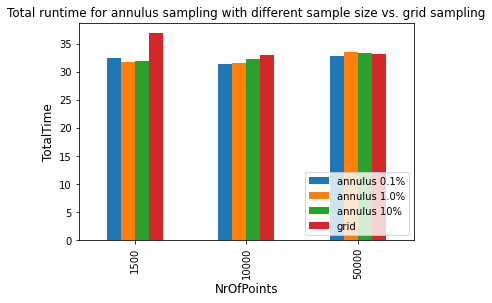

In [15]:
ball_01 = [32.498000, 31.522000, 32.974333]
ball_1 = [31.732000, 31.650000, 33.624000]
ball_10 = [32.052000, 32.364000, 33.365667]
grid = [36.926000, 33.088000, 33.222333]
index = ['1500', '10000', '50000']
df = pd.DataFrame({'annulus 0.1%': ball_01,
                   'annulus 1.0%': ball_1,
                   'annulus 10%': ball_10,
                   'grid': grid}, index=index)
ax = df.plot.bar()
ax.set_ylabel("TotalTime", size = 12)
ax.set_xlabel("NrOfPoints", size = 12);
ax.set_title("Total runtime for annulus sampling with different sample size vs. grid sampling")
ax.legend(loc='lower right')

<ipython-input-65-853c6e6f73b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_N["SampleRatio"] = large_N["SampleRatio"].astype(str)
<ipython-input-65-853c6e6f73b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_N["SampleRatio"] = large_N["SampleRatio"].astype(str)


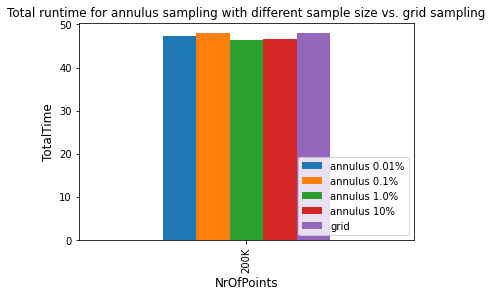

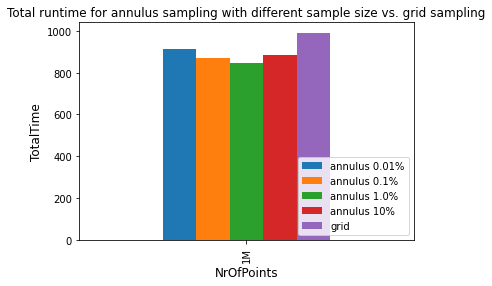

In [65]:
nrOfPoints = [(200000, ['200K']), (1000000, ['1M'])]
for N, index_list in nrOfPoints:
    large_N = runtime[runtime["NrOfPoints"]==N]
    large_N["SampleRatio"] = large_N["SampleRatio"].astype(str)
    ball_001 = large_N[large_N["SampleRatio"]=='0.010000000000000002']["TotalTime"].tolist()
    ball_01 = large_N[large_N["SampleRatio"]=='0.10000000000000003']["TotalTime"].tolist()
    ball_1 = large_N[large_N["SampleRatio"]=='1.0']["TotalTime"].tolist()
    ball_10 = large_N[large_N["SampleRatio"]=='10.0']["TotalTime"].tolist()
    grid = large_N[large_N["SamplingMethod"]=='Grid']["TotalTime"].tolist()
    df = pd.DataFrame({'annulus 0.01%': ball_001,
                       'annulus 0.1%': ball_01,
                       'annulus 1.0%': ball_1,
                       'annulus 10%': ball_10,
                       'grid': grid}, index=index_list)
    ax = df.plot.bar()
    ax.set_ylabel("TotalTime", size = 12)
    ax.set_xlabel("NrOfPoints", size = 12);
    ax.set_title("Total runtime for annulus sampling with different sample size vs. grid sampling")
    ax.legend(loc='lower right')

<ipython-input-59-4ea757e5e74c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_N["SampleRatio"] = large_N["SampleRatio"].astype(str)


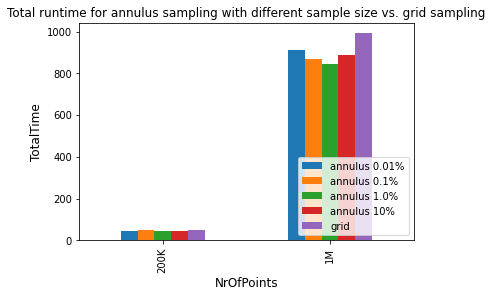

In [59]:
large_N = runtime[runtime["NrOfPoints"].isin([200000, 1000000])]
large_N["SampleRatio"] = large_N["SampleRatio"].astype(str)
ball_001 = large_N[large_N["SampleRatio"]=='0.010000000000000002']["TotalTime"].tolist()
ball_01 = large_N[large_N["SampleRatio"]=='0.10000000000000003']["TotalTime"].tolist()
ball_1 = large_N[large_N["SampleRatio"]=='1.0']["TotalTime"].tolist()
ball_10 = large_N[large_N["SampleRatio"]=='10.0']["TotalTime"].tolist()
grid = large_N[large_N["SamplingMethod"]=='Grid']["TotalTime"].tolist()
index = ['200K', '1M']
df = pd.DataFrame({'annulus 0.01%': ball_001,
                   'annulus 0.1%': ball_01,
                   'annulus 1.0%': ball_1,
                   'annulus 10%': ball_10,
                   'grid': grid}, index=index)
ax = df.plot.bar()
ax.set_ylabel("TotalTime", size = 12)
ax.set_xlabel("NrOfPoints", size = 12);
ax.set_title("Total runtime for annulus sampling with different sample size vs. grid sampling")
ax.legend(loc='lower right')